In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Load and preprocess your dataset
data = pd.read_csv('Day4_medico.csv')  
X = data.drop('Outcome', axis=1)  
y = data['Outcome']

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

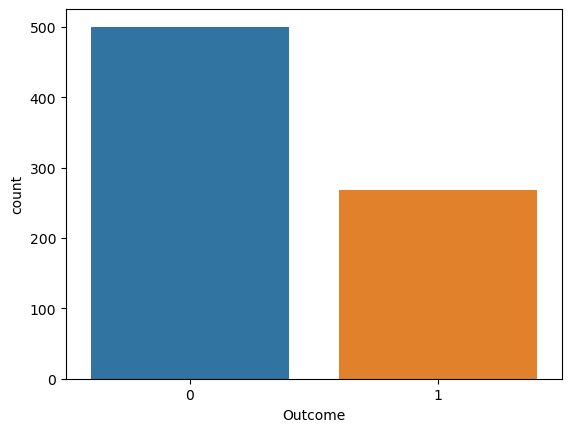

In [6]:
sns.countplot(data,x='Outcome')

In [7]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
ran_f=RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',X_train.shape)
print()
print('Training data-y- Shape:\t',y_train.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',X_test.shape)
print()
print('Testing data(y-Outcome) Shape:\t',y_test.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (614, 8)

Training data-y- Shape:	 (614,)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (154, 8)

Testing data(y-Outcome) Shape:	 (154,)


# Scaling

In [8]:
# Apply feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ran_f.fit(X_train_scaled, y_train)
y_pred = ran_f.predict(X_test_scaled)
accuracy_scalling = accuracy_score(y_test, y_pred)

print("\nFeature Scaling Accuracy:\t", accuracy_scalling)


Feature Scaling Accuracy:	 0.7467532467532467


# LDA (Linear Discriminant Analysis)

In [9]:
# LDA (Linear Discriminant Analysis)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

lda = LinearDiscriminantAnalysis(n_components=1) 
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

ran_f.fit(X_train_lda, y_train)
y_pred_LDA = ran_f.predict(X_test_lda)
accuracy_LDA = accuracy_score(y_test, y_pred_LDA)

print("\nLDA Accuracy:\t", accuracy_LDA)



LDA Accuracy:	 0.7597402597402597


# PCA (Principal Component Analysis)

In [10]:
# PCA (Principal Component Analysis)
from sklearn.decomposition import PCA

pca = PCA(n_components=5)  # We can adjust the number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

ran_f.fit(X_train_pca, y_train)
y_pred_PCA = ran_f.predict(X_test_pca)
accuracy_PCA= accuracy_score(y_test, y_pred_PCA)

print("\nPCA Accuracy:\t", accuracy_PCA)


PCA Accuracy:	 0.6753246753246753


# Handling class imbalance.

Majority length:	 500
Minority length:	 268
(1000, 9)

Axes(0.125,0.11;0.775x0.77)


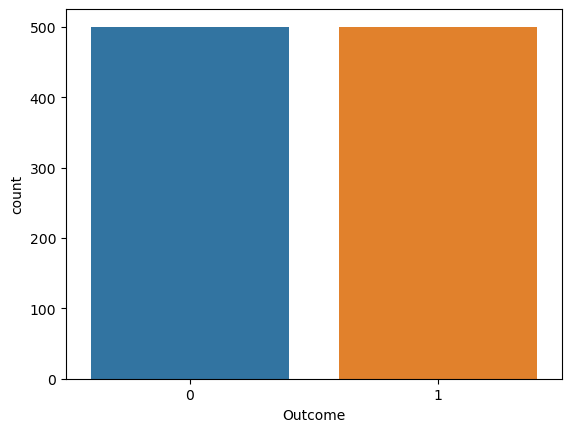

In [12]:
from sklearn.utils import resample

# Split the data into majority and minority classes
df_majority = data[data.Outcome == 0]
df_minority = data[data.Outcome == 1]

print('Majority length:\t', len(df_majority))
print('Minority length:\t', len(df_minority))
print('='*100)

# Upsample the minority class
df_minority_upsampled = resample(df_minority,
    replace=True,  # Sample with replacement
    n_samples=len(df_majority),  # To match the majority class
    random_state=12
)

# Combine the upsampled minority class with the majority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

print(df_upsampled.shape)
print()
print(sns.countplot(df_upsampled,x='Outcome'))


In [13]:
x=df_upsampled.iloc[:,:-1]
y=df_upsampled.iloc[:,-1:]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (750, 8)

Training data-y- Shape:	 (750, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (250, 8)

Testing data(y-Outcome) Shape:	 (250, 1)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#invoke the log reg algorithm from sklearn
log_reg=LogisticRegression(solver='liblinear',verbose=2)
#Train the model
print('Training the model\n')
log_reg.fit(xtrain,ytrain)
#Test the model
ypred=log_reg.predict(xtest)
print('Predicted Label for the input samples:\n',ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))
print('********************Performance Measures for Logistic Regression Classification******************')
accuracy_upsampled=accuracy_score(ytest,ypred)
print('Accuracy Score:\t\n',accuracy_upsampled)
print()
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report:\n',classification_report(ytest,ypred))
print('='*80)

Training the model

[LibLinear]Predicted Label for the input samples:
 [1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0
 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1
 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0
 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0]

Testing is completed

Testing samples are: 	 250
********************Performance Measures for Logistic Regression Classification******************
Accuracy Score:	
 0.736

Confusion Matrix:
 [[87 34]
 [32 97]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.72       121
           1       0.74      0.75      0.75       129

    accuracy         

C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Majority lenght:	 500

Minority Length:	 268
(536, 9)

Axes(0.125,0.11;0.775x0.77)


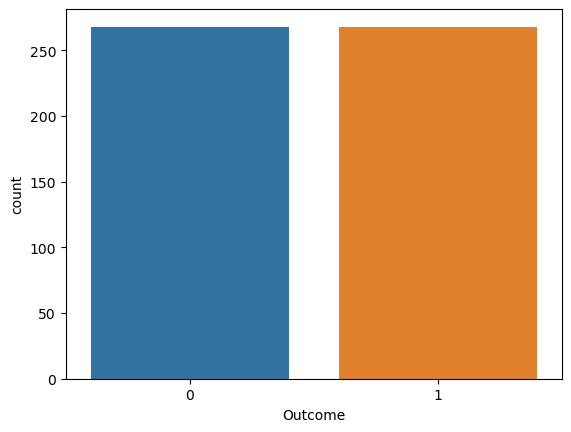

In [15]:
from sklearn.utils import resample
df_majority=data[data.Outcome==0]
df_minority=data[data.Outcome==1]
print('Majority lenght:\t',len(df_majority))
print()
print('Minority Length:\t',len(df_minority))
print('='*100)
#Upsample
df_majority_downsampled=resample(df_majority,
 replace=False, # sample with replacement
 n_samples=268, #to match the majority class
 random_state=12
 )
df_downsampled=pd.concat([df_majority_downsampled,df_minority])
print(df_downsampled.shape)
print()
print(sns.countplot(df_downsampled,x='Outcome'))

In [16]:
x=df_downsampled.iloc[:,:-1]
y=df_downsampled.iloc[:,-1:]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)


****************Training Data Shape********************

Training data-X- Shape:	 (402, 8)

Training data-y- Shape:	 (402, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (134, 8)

Testing data(y-Outcome) Shape:	 (134, 1)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#invoke the log reg algorithm from sklearn
log_reg=LogisticRegression(solver='liblinear',verbose=2)
#Train the model
print('Training the model\n')
log_reg.fit(xtrain,ytrain)
#Test the model
ypred=log_reg.predict(xtest)
print('Predicted Label for the input samples:\n',ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))
print('********************Performance Measures for Logistic Regression Classification******************')
accuracy_downsampled=accuracy_score(ytest,ypred)
print('\nAccuracy Score:\t',accuracy_downsampled)
print()
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report:\n',classification_report(ytest,ypred))
print('='*80)

Training the model

[LibLinear]Predicted Label for the input samples:
 [0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1
 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1
 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1
 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1]

Testing is completed

Testing samples are: 	 134
********************Performance Measures for Logistic Regression Classification******************

Accuracy Score:	 0.7238805970149254

Confusion Matrix:
 [[49 22]
 [15 48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.69      0.73        71
           1       0.69      0.76      0.72        63

    accuracy                           0.72       134
   macro avg       0.73      0.73      0.72       134
weighted avg       0.73      0.72      0.72       134



C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score

# Upsampling with SMOTE
smote = SMOTE(sampling_strategy='auto')
X_train_upsampled, y_train_upsampled = smote.fit_resample(X_train_scaled, y_train)

# Downsampling with RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto')
X_train_downsampled, y_train_downsampled = rus.fit_resample(X_train_scaled, y_train)

# Train and evaluate the model after upsampling
model.fit(X_train_upsampled, y_train_upsampled)
y_pred_upsampled = model.predict(X_test_scaled)
accuracy_upsampled = accuracy_score(y_test, y_pred_upsampled)

# Train and evaluate the model after downsampling
model.fit(X_train_downsampled, y_train_downsampled)
y_pred_downsampled = model.predict(X_test_scaled)
accuracy_downsampled = accuracy_score(y_test, y_pred_downsampled)

print("SMOTE Upsampling Accuracy:", accuracy_upsampled)
print("RandomUnderSampler Downsampling Accuracy:", accuracy_downsampled)


SMOTE Upsampling Accuracy: 0.7532467532467533
RandomUnderSampler Downsampling Accuracy: 0.7402597402597403


In [30]:
# Handling class imbalance with SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

ran_f.fit(X_train_resampled, y_train_resampled)
y_pred = ran_f.predict(X_test_scaled)
accuracy_smote = accuracy_score(y_test, y_pred)

print("\nSMOTE Accuracy:\t", accuracy_smote)


SMOTE Accuracy:	 0.7402597402597403


# GridSearchCV

In [31]:
# Model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()  

# Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)
print("\nGridSearchCV Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy_grid_search_cv = accuracy_score(y_test, y_pred)

print("\nGridSearchCV Accuracy:\t", accuracy_grid_search_cv)



GridSearchCV Best Parameters: {'max_depth': 20, 'n_estimators': 300}

GridSearchCV Accuracy:	 0.7597402597402597


# RandomizedSearchCV

In [32]:
# Hyperparameter tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

random_param_grid = {'n_estimators': np.arange(100, 1000, 100), 'max_depth': np.arange(10, 100, 10)}
random_search = RandomizedSearchCV(model, random_param_grid, n_iter=10, cv=5)
random_search.fit(X_train_resampled, y_train_resampled)
print("\nRandomizedSearchCV Best Parameters:", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy_ran_search_cv = accuracy_score(y_test, y_pred)

print("\nRandomizedSearchCV Accuracy:\t", accuracy_ran_search_cv)


RandomizedSearchCV Best Parameters: {'n_estimators': 900, 'max_depth': 80}

RandomizedSearchCV Accuracy:	 0.7337662337662337


# Cross-validation

In [33]:
# Cross-validation
from sklearn.model_selection import KFold,LeaveOneOut,cross_val_score

kfold = KFold(n_splits=5)
loocv = LeaveOneOut()
cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=kfold) 

average_accuracy = np.mean(cv_scores)

print("\nK-Fold Cross-Validation Accuracy:\t", average_accuracy)


K-Fold Cross-Validation Accuracy:	 0.8242546583850932


In [34]:
# Train and evaluate the model
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
f1 = f1_score(y_test, y_pred)
print("\nF1 Score:", f1)


Accuracy: 0.7532467532467533

F1 Score: 0.6885245901639345


# Receiver Operating Characteristic 

In [35]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print("\nAUC:", auc)

# Feature Importance
feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(importance_df)


Confusion Matrix:
[[74 25]
 [13 42]]

AUC: 0.8220385674931129

Feature Importance:
                    Feature  Importance
1                   Glucose    0.247180
5                       BMI    0.178709
7                       Age    0.160977
6  DiabetesPedigreeFunction    0.103804
2             BloodPressure    0.087795
0               Pregnancies    0.086403
3             SkinThickness    0.070862
4                   Insulin    0.064270


# Summary

In [36]:
# Summary
print("Summary:")
print("\nAccuracy:", accuracy)
print("\nF1 Score:", f1)
print("\nAUC:", auc)
print("\nGridSearchCV Best Parameters:", grid_search.best_params_)
print("\nRandomizedSearchCV Best Parameters:", random_search.best_params_)
print("\nFeature Importance:")
print(importance_df)

print("\n\nFeature Scaling Accuracy:\t", accuracy_scalling)
print("\nLDA Accuracy:\t", accuracy_LDA)
print("\nPCA Accuracy:\t", accuracy_PCA)
print("\nSMOTE Accuracy:\t", accuracy_smote)
print("\nSMOTE Upsampling Accuracy:\t", accuracy_upsampled)
print('\nAccuracy Score after Down sampling:\t',accuracy_downsampled)
print("\nRandomUnderSampler Downsampling Accuracy:\t", accuracy_downsampled)
print("\nGridSearchCV Accuracy:\t", accuracy_grid_search_cv)
print("\nRandomizedSearchCV Accuracy:\t", accuracy_ran_search_cv)
print("\nK-Fold Cross-Validation Accuracy:\t", average_accuracy)


Summary:

Accuracy: 0.7532467532467533

F1 Score: 0.6885245901639345

AUC: 0.8220385674931129

GridSearchCV Best Parameters: {'max_depth': 20, 'n_estimators': 300}

RandomizedSearchCV Best Parameters: {'n_estimators': 900, 'max_depth': 80}

Feature Importance:
                    Feature  Importance
1                   Glucose    0.247180
5                       BMI    0.178709
7                       Age    0.160977
6  DiabetesPedigreeFunction    0.103804
2             BloodPressure    0.087795
0               Pregnancies    0.086403
3             SkinThickness    0.070862
4                   Insulin    0.064270


Feature Scaling Accuracy:	 0.7467532467532467

LDA Accuracy:	 0.7597402597402597

PCA Accuracy:	 0.6753246753246753

SMOTE Accuracy:	 0.7402597402597403

SMOTE Upsampling Accuracy:	 0.7532467532467533

Accuracy Score after Down sampling:	 0.7402597402597403

RandomUnderSampler Downsampling Accuracy:	 0.7402597402597403

GridSearchCV Accuracy:	 0.7597402597402597

RandomizedS

# ROC Curve

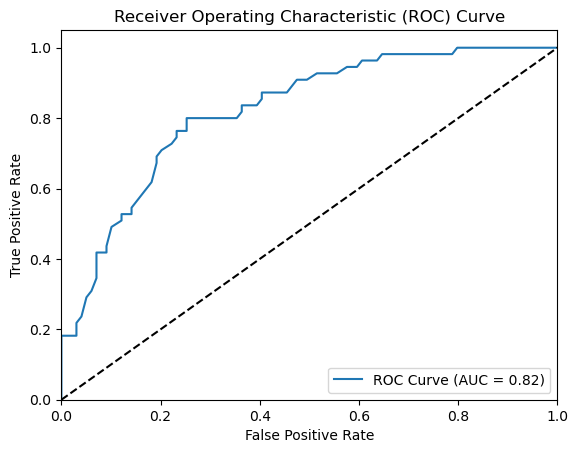

In [37]:
# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

